In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

a,b,w = sp.symbols('a,b,w')
# Define other symbolic variables
a1,b1,pin,pout,wa,wb,v,k,d,s21,H = sp.symbols('a_1,b_1,p_{in},p_{out},w_a,w_b,v,k,d,s_{21},H')
#a1=alpha b1=beta v=gamma a=annihilation op for photon and b= annihilattion op for magnon

# Define imaginary unit
j = sp.I

# Define equations
eq1 = sp.Eq(((w-wa+a1*j)*a)*j - (sp.sqrt(v)*pin)*j - v*a - sp.sqrt(k*v)*b - (d*b)*j, 0)
eq2 = sp.Eq(((w-wb+b1*j)*b)*j - (sp.sqrt(k)*pin)*j - k*b - sp.sqrt(k*v)*a - (d*a)*j, 0)

eq3 = sp.Eq(((w-wa+a1*j)*a)*j - (sp.sqrt(v)*pout)*j + v*a + sp.sqrt(k*v)*b - (d*b)*j, 0)
eq4 = sp.Eq(((w-wb+b1*j)*b)*j - (sp.sqrt(k)*pout)*j + k*b + sp.sqrt(k*v)*a - (d*a)*j, 0)
eq5 = sp.Eq(s21,(pout/pin)-1)
# Print equations
#print("Equations:", eq1, eq2)


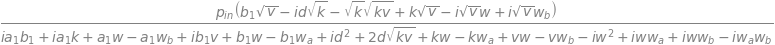

In [3]:
# Solve equations
sol1 = sp.solve(eq1, b)
#solution = sp.solve([eq1, eq3], (pout))
solution1 = sp.solve( eq2.subs(b, sol1[0]), a)
solution1[0]

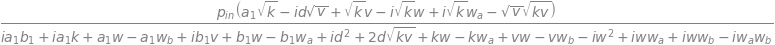

In [4]:
# Solve equations
sol2 = sp.solve(eq1, a)
solution2 = sp.solve( eq2.subs(a, sol2[0]), b)
solution2[0]

In [5]:
# Compute the difference between eq1 and eq3
difference_eq1_eq3 = eq1.lhs - eq3.lhs

# Define the new equation
new_eq = sp.Eq(difference_eq1_eq3, 0)
new_eq
# Print the new equation
#print("Difference between eq1 and eq3:", new_eq)


In [6]:
# Substitute the values of a and b into new_eq
new_eq_substituted = new_eq.subs({a: solution1[0], b: solution2[0]})

# Print the new equation with substituted values
print(new_eq_substituted)


Eq(-I*p_{in}*sqrt(v) - 2*p_{in}*v*(b_1*sqrt(v) - I*d*sqrt(k) - sqrt(k)*sqrt(k*v) + k*sqrt(v) - I*sqrt(v)*w + I*sqrt(v)*w_b)/(I*a_1*b_1 + I*a_1*k + a_1*w - a_1*w_b + I*b_1*v + b_1*w - b_1*w_a + I*d**2 + 2*d*sqrt(k*v) + k*w - k*w_a + v*w - v*w_b - I*w**2 + I*w*w_a + I*w*w_b - I*w_a*w_b) - 2*p_{in}*sqrt(k*v)*(a_1*sqrt(k) - I*d*sqrt(v) + sqrt(k)*v - I*sqrt(k)*w + I*sqrt(k)*w_a - sqrt(v)*sqrt(k*v))/(I*a_1*b_1 + I*a_1*k + a_1*w - a_1*w_b + I*b_1*v + b_1*w - b_1*w_a + I*d**2 + 2*d*sqrt(k*v) + k*w - k*w_a + v*w - v*w_b - I*w**2 + I*w*w_a + I*w*w_b - I*w_a*w_b) + I*p_{out}*sqrt(v), 0)


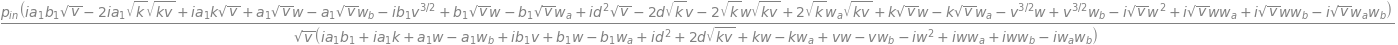

In [7]:
solution3 = sp.solve(new_eq_substituted, pout)
solution3[0]

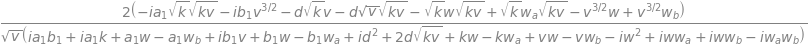

In [8]:
# Solve equation eq5 for s21 after substituting pout from solution3
solution4 = sp.solve(eq5.subs(pout, solution3[0]), s21)

# Assign the value of s21 to a variable
S = solution4[0]
S

# Print the value of s21
#print(S)


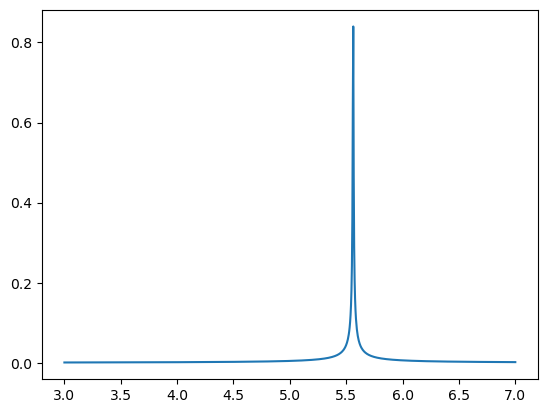

In [9]:
wn=np.linspace(3,7,1000)
Sfunc = sp.lambdify([w,wb],S.subs({v:0.0004,k:0.001,wa:3,b1:0.001,a1:0.003,d:2}) )
for wm_n in [4]:
        plt.plot(wn,np.abs(Sfunc(wn,wm_n)))

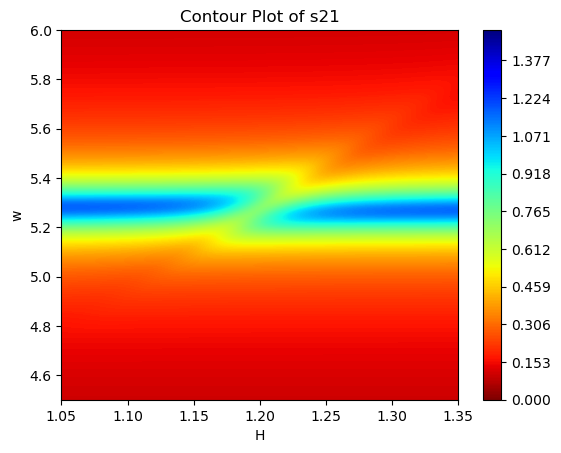

In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

d_value=0.0541    # coupling strength between photon (cavity) and magnon mode d=j+if'  where f'= f+sqrt(vk)
k_value=0.0001  # extrinsic damping of magnon mode 1 
v_value=0.04 #gamma extrinsic damping of cavity
wa_value=5.275     # cavity resonance frequency 
b1_value=0.0714 # intrinsic damping of magnon mode

a1_value=0.028  # intrinsic damping of cavity 

s21_1=S.subs({v:v_value,wa:wa_value,a1:a1_value,b1:b1_value,k:k_value,d:d_value})


# Define parameter ranges
H_values = np.linspace(1.050, 1.350, 101)
w_values = np.linspace(4.5, 6, 1001)

# Convert symbolic expression s21 to a NumPy function
s21_func = sp.lambdify((w, wb), sp.Abs(s21_1), modules='numpy')

# Initialize a list to store s21_f
s21_f = []

# Loop over each H value
for H in H_values:
    # Calculate wb_value for the current H value
    #wb_value = 2.8*np.sqrt(H * (H + 0.172))
    wb_value=1.38284384+(3.24789744)*H
    
    # Initialize a list to store s21_3 values for the current H value
    s21_f_H = []
    
    for w_val in w_values:
        s21_2 = s21_func(w_val, wb_value)
        s21_f_H.append(s21_2)
      
    # Append s21_f_H to s21_f as a row
    s21_f.append(s21_f_H)

# Convert s21_f to a numpy array and transpose it
s21_f = np.array(s21_f).T  # Transpose s21_f here
H_f = np.array(H_values)
w_f = np.array(w_values)

# Create a contour plot
#contour = plt.contourf(H_f, w_f, s21_f, )
contour = plt.contourf(H_f, w_f, s21_f, cmap='jet_r', levels=np.linspace(0, 1.5, 501))
plt.colorbar(contour)
plt.xlabel('H')
plt.ylabel('w')
plt.title('Contour Plot of s21')
plt.show()

#print(s21_f)
#print(H_f)
#print(w_f)
#s21_f.shape[0]
#H_f.shape[0]
#plt.ylim([3.6, 4.4])
#plt.xlim([1250, 1450])
# plt.clim(-7, 0)



Gradient calculation test

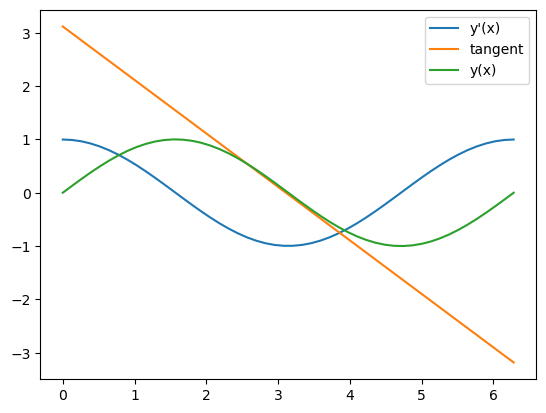

In [11]:
x = np.linspace(0,2*np.pi)
y = np.sin(x)
y_ = np.gradient(y,x[1]-x[0])
plt.plot(x, y_,label="y'(x)")
plt.plot(x, y[20]-1/y_[0]*(x-x[20]),label="tangent")
plt.plot(x,y,label="y(x)")
plt.legend()
plt.show()

# Variation in $\lambda_m$

In [12]:
import sympy as sp
import numpy as np
import os
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

%matplotlib inline

J, gamma = sp.symbols('J, gamma') # d=J+j*gamma
# Define given values
J_values = [.123]
J_value = 0.16
gamma_value = 0.001
gamma_values = [gamma_value]

w_plus = ((wa + wb) - j * (a1 + b1 + v + k) + sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2
w_minus = ((wa + wb) - j * (a1 + b1 + v + k) - sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2

w_plus_sub = w_plus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, gamma: gamma_value})#, J:J_value})#, k: k_value})
w_minus_sub = w_minus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, gamma: gamma_value})#, J:J_value})#, k: k_value})


def theoretical_wpm(J_value, lamb_val, Hlist, frequencies, obs_s21_data):

    # Substitute known values into the equations

    # Create a lambdified function for w_plus
    # w_plus_func = sp.lambdify([wb,J], sp.re(w_plus_sub), modules='numpy')
    # w_minus_func = sp.lambdify([wb,J], sp.re(w_minus_sub), modules='numpy')
    w_plus_func = sp.lambdify([wb,J,k], sp.re(w_plus_sub), modules='numpy')
    w_minus_func = sp.lambdify([wb,J,k], sp.re(w_minus_sub), modules='numpy')


    # Define H values
    # H_values = np.linspace(1.050, 1.350, 101)
    w_plus_results = []
    w_minus_results = []

    

    s21_theo = np.zeros(obs_s21_data.shape)

    # Loop through H values and calculate w_plus2
    for idx, H in enumerate(Hlist):
        wb_value = 1.68e-2/2/np.pi*np.sqrt(H * (H + 1750))
        # wb_value = 1.38284384 + (3.24789744) * H
        
        w_plus2 = w_plus_func(wb_value,J_value,lamb_val)
        w_minus2 = w_minus_func(wb_value,J_value,lamb_val)
        
        w_plus_results.append(w_plus2)
        w_minus_results.append(w_minus2)

        # s21_theo[np.where( (frequencies - w_plus2)**2 == np.min( (frequencies - w_plus2)**2 ) ),idx] += 1
        # s21_theo[np.where( (frequencies - w_minus2)**2 == np.min( (frequencies - w_minus2)**2 ) ),idx] += 1

    return np.array(w_plus_results), np.array(w_minus_results), s21_theo

# for J_value in J_values:
def cost_func(J_value, lamb_val, Hlist, frequencies, obs_s21_data):    # Define the equations

    _, _, s21_theo = theoretical_wpm(J_value, lamb_val, Hlist, frequencies, obs_s21_data)

    return np.mean((s21_theo+obs_s21_data)**2)

root = os.path.join(os.getcwd(),"data","lone_t_sweep_yig")
# J_values = np.linspace(0.09, 0.237, 7)
J_values = [0.118,0.145,0.164, 0.1845, 0.21,0.228,0.24]
lamb_vals = [.13, .15, .1, .07, .04, .01, .01]

fig, axes = plt.subplots(2,3,figsize=(15,10),sharex=True,sharey=True)

for roots,dirs,files in os.walk(root):
    # file_path_full = os.path.join(root,f"{type}.csv")

    for idx, file in enumerate(files):

        if file == 'yig_t_0.06.csv':
            continue

        ax = axes[idx//4,idx%4]
        full_data = pd.read_csv(os.path.join(root,file))

        # Display the first few rows of the DataFrame
        frequencies = full_data.to_numpy()[:,0]
        # frequencies = np.linspace(4.5, 6, frequencies.size) 
        Hlist = np.array(full_data.columns)[1:].astype(float) # Skip the first column which is 'Frequency'
        # Hlist = np.linspace(1.050, 1.350, Hlist.size)
        s21 = full_data.to_numpy()[:,1:] # Skip the first column which is 'Frequency'

        def objective(x): 
            return cost_func(x[0],x[1], Hlist, frequencies, s21)

        optimal_J_value = J_values[idx]
        optimal_lamb_val = lamb_vals[idx]

        # Optimize the objective function for J_value : comment these lines to turn optimizer off
        # result = minimize(objective, [optimal_J_value, optimal_lamb_val])
        # optimal_J_value = result.x[0]
        # optimal_lamb_val = result.x[1]

        # Calculate the theoretical w_plus and w_minus using the optimal J_value
        w_plus_results, w_minus_results, _ = theoretical_wpm(optimal_J_value, optimal_lamb_val, Hlist, frequencies, s21)

        ### Normals treatment starts
        # wp_grads = np.gradient(w_plus_results)#,Hlist[1]-Hlist[0])
        # wm_grads = np.gradient(w_minus_results)#,Hlist[1]-Hlist[0])

        # com_norm = w_minus_results[np.where( np.abs(Hlist - 1300) <= 2 )] - (Hlist-1300)/wm_grads[np.where( np.abs(Hlist - 1300) <= 2 )]
        
        # for H1 in Hlist:
        #     wp_n = wp_normals(H1)        
        #     for H2 in Hlist:
        ### Normals treatment ends

            # plt.plot(Hlist,w_plus_results);plt.plot(Hlist,w_minus_results)   

        # Plot the results
        ax.pcolormesh(Hlist, frequencies, s21, cmap='inferno_r')
        # ax.colorbar()
        ax.plot(Hlist, w_plus_results,'w--', label='w_plus')
        # ax.plot(Hlist, com_norm, 'r', label='common normal')
        ax.plot(Hlist, w_minus_results,'w--', label='w_minus')
        ax.set_xlabel('H Values')
        # ax.set_xlim((1.22,1.35))
        ax.set_xlim(900,1600)
        ax.set_ylim((5,5.6))
        # ax.set_ylim(0,.1)
        ax.set_ylabel('w_plus and w_minus')
        ax.set_title(f'{file} $J={optimal_J_value:.2f}$ $\\lambda_m$={optimal_lamb_val:.2f}')
plt.tight_layout()
# plt.legend()
# plt.savefig(os.path.join(os.getcwd(),'results','lone_yig_sweep',f"{file}.png"))
plt.savefig("tr_photon_lone_yig.png")
plt.close()


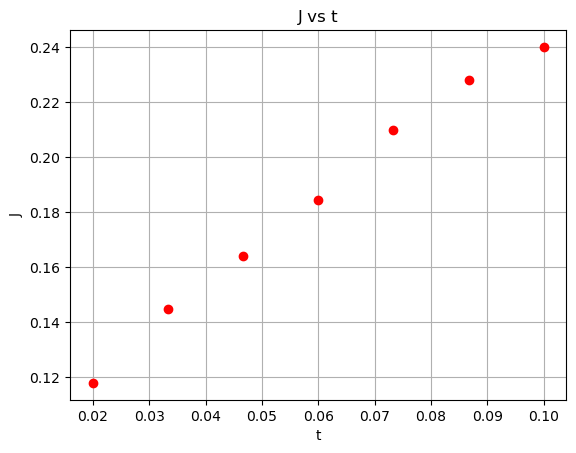

In [4]:
import os
import matplotlib.pyplot as plt

root = os.path.join(os.getcwd(),"data","lone_t_sweep_yig")
# J_values = np.linspace(0.09, 0.237, 7)
J_values = [0.118,0.145,0.164, 0.1845, 0.21,0.228,0.24]

for roots,dirs,files in os.walk(root):
    # file_path_full = os.path.join(root,f"{type}.csv")

    for idx, file in enumerate(files):
        t_val = float('0.'+file.split('.')[1])
        plt.plot(t_val, J_values[idx], 'ro')

plt.title('J vs t')
plt.xlabel('t')
plt.ylabel('J')
plt.grid()

plt.savefig('images\\Jvst.png')

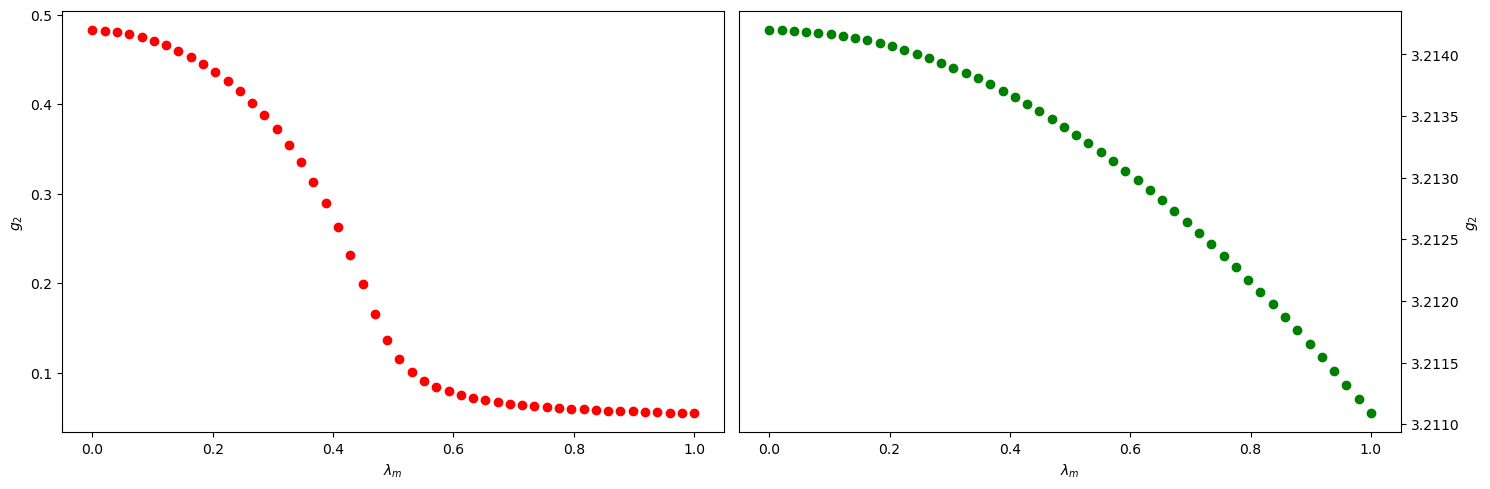

In [13]:
H_value = 1300

fig, axs = plt.subplots(1,2,figsize=(15,5))

lamb_array = np.linspace(0,1)
for optimal_lamb_val in lamb_array:
    w_plus_results, w_minus_results, _ = theoretical_wpm(optimal_J_value, optimal_lamb_val, Hlist, frequencies, s21)
    idx = np.where( np.abs(Hlist - H_value) <= 2 )
    coupling_strength = np.abs(w_minus_results[idx] - w_plus_results[idx])
    axs[0].plot(optimal_lamb_val, coupling_strength, 'ro')
axs[0].set_xlabel('$\\lambda_m$')
axs[0].set_ylabel('$g_2$')


H_value = 300

lamb_array = np.linspace(0,1)
for optimal_lamb_val in lamb_array:
    w_plus_results, w_minus_results, _ = theoretical_wpm(optimal_J_value, optimal_lamb_val, Hlist, frequencies, s21)
    idx = np.where( np.abs(Hlist - H_value) <= 2 )
    coupling_strength = np.abs(w_minus_results[idx] - w_plus_results[idx])
    axs[1].plot(optimal_lamb_val, coupling_strength, 'go')
    axs[1].yaxis.tick_right()
    axs[1].yaxis.set_label_position("right")
    # axs[1].yaxis.tick_right()
    # axs[1].ylabel.tick_right()

axs[1].set_xlabel('$\\lambda_m$')
axs[1].set_ylabel('$g_2$')
plt.tight_layout()
plt.show()

In [ ]:
lamb_array = np.linspace(0,1)
J_array = np.linspace(0,1)
x, y = np.meshgrid(lamb_array, J_array)
coupling_matrix = np.zeros(x.shape)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        w_plus_results, w_minus_results, _ = theoretical_wpm(x[i,j], y[i,j], Hlist, frequencies, s21)
        idx = np.where( np.abs(Hlist - 1300) <= 1 )
        coupling_matrix[i,j] = np.abs(w_minus_results[idx] - w_plus_results[idx])

C:\Users\freak\AppData\Local\Temp\ipykernel_5424\864405027.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coupling_matrix[i,j] = np.abs(w_minus_results[idx] - w_plus_results[idx])


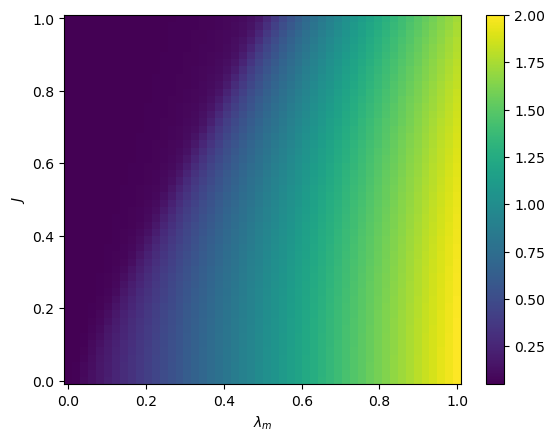

In [ ]:
%matplotlib inline

import matplotlib.colors as colors
plt.pcolormesh(x, y, coupling_matrix)#,norm=colors.LogNorm(vmin=coupling_matrix.min(), vmax=coupling_matrix.max()))
plt.colorbar()
plt.xlabel('$\\lambda_m$')
plt.ylabel('$J$')
plt.show()

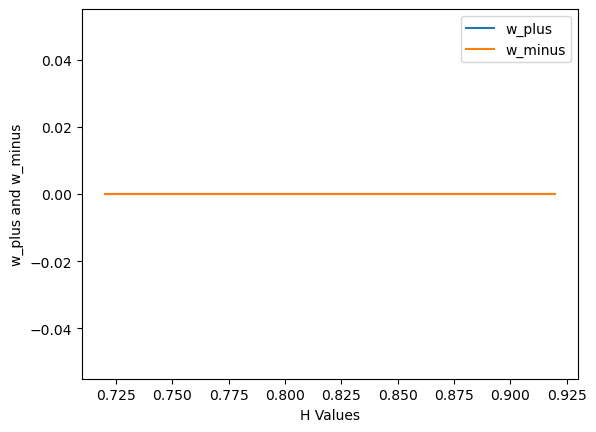

In [ ]:

J, gamma = sp.symbols('J, gamma') # d=J+j*gamma
J_value = 0.0
gamma_value = 0.03


# Define the equations
w_plus = ((wa + wb) - j * (a1 + b1 + v + k) + sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2
w_minus = ((wa + wb) - j * (a1 + b1 + v + k) - sp.sqrt(4 * (J + j * gamma)**2 + ((wa - wb) - j * (a1 + v - b1 - k))**2)) / 2

# Substitute known values into the equations
w_plus_func = sp.lambdify(wb, sp.im(w_plus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, k: k_value, J: J_value, gamma: gamma_value})), modules='numpy')
w_minus_func = sp.lambdify(wb, sp.im(w_minus.subs({v: v_value, wa: wa_value, a1: a1_value, b1: b1_value, k: k_value, J: J_value, gamma: gamma_value})), modules='numpy')

# Define H values
H_values = np.linspace(0.720, 0.920, 101)

# Calculate w_plus and w_minus for each H value
w_plus_results = [w_plus_func(1.38284384 + (3.24789744) * H) for H in H_values]
w_minus_results = [w_minus_func(1.38284384 + (3.24789744) * H) for H in H_values]

# Plot the results
plt.plot(H_values, w_plus_results, label='w_plus')
plt.plot(H_values, w_minus_results, label='w_minus')
plt.xlabel('H Values')
plt.ylabel('w_plus and w_minus')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Define the coefficients of the equations in a list of lists
# Each sublist corresponds to an equation and contains coefficients of variables [a, b, c]
coefficients = [
    [a1, b1, c1],
    [a2, b2, c2],
    # Add more equations here...
]

# Define the constants on the right side of each equation
constants = [d1, d2,  # Add more constants corresponding to each equation here...
]

# Convert the lists to numpy arrays
A = np.array(coefficients)
B = np.array(constants)

# Solve the system of equations
solutions = np.linalg.solve(A, B)

# Output the solutions
print("Solutions:", solutions)


NameError: name 'c1' is not defined